In [1]:
import matplotlib.pyplot as plt
import torch
import importlib
from sklearn import datasets, manifold
import LMPL
from LMPL import LMPL_org, train_org
import torch.optim as optim
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

from sklearn.datasets import make_swiss_roll

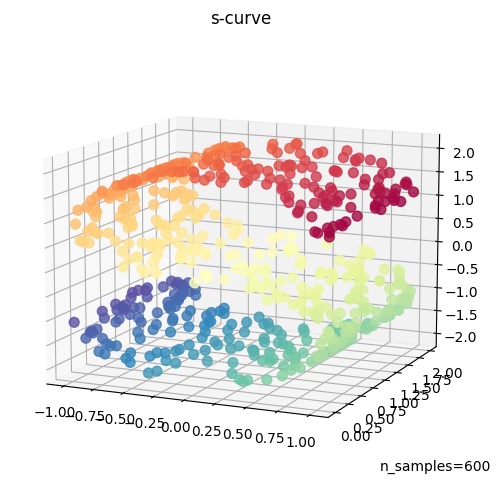

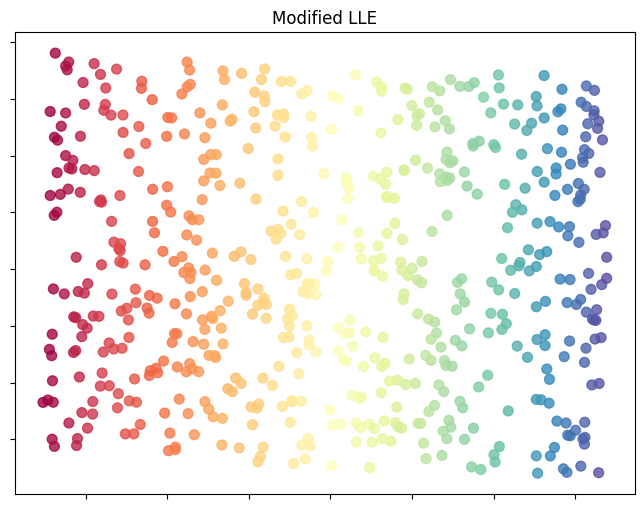

In [14]:
from matplotlib.ticker import NullFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

X, color = datasets.make_s_curve(n_samples=600, random_state=0)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

scatter3d = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=50, alpha=0.8)
ax.set_title("s-curve")
ax.view_init(azim=-66, elev=12)
ax.text2D(0.8, 0.05, s="n_samples=600", transform=ax.transAxes)

plt.show()

#use modified LLE
Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, 
                                    eigen_solver='auto', method='modified').fit_transform(X)

fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111)
scatter2d = ax2.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral, s=50, alpha=0.8)
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.set_title("Modified LLE")
plt.axis('tight')
plt.show()


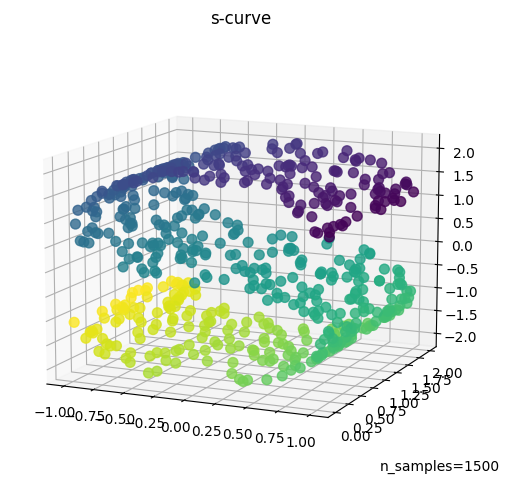

In [2]:
X, color = datasets.make_s_curve(n_samples=600, random_state=0)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    X[:, 0], X[:, 1], X[:, 2], c=color, s=50, alpha=0.8
)
ax.set_title("s-curve")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)


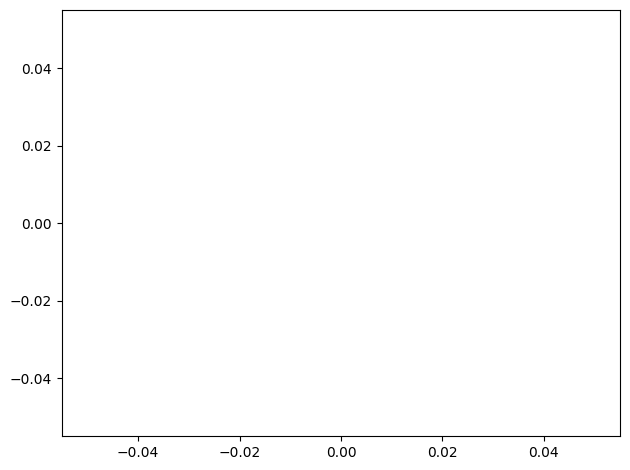

In [12]:
from matplotlib.ticker import NullFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold

fig = plt.figure(figsize=(12, 6))

try:
    ax1 = fig.add_subplot(251, projection='3d')
    ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax1.view_init(4, -72)
except Exception as e:
    print(f"Error creating 3D plot: {e}")
    ax1 = fig.add_subplot(251)
    ax1.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)

# Modified LLE 
Y = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2, 
                                    eigen_solver='auto', method='modified').fit_transform(X)

ax2 = fig.add_subplot(1, 2, 2)
scatter = ax2.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.set_title("Modified LLE")
plt.axis('tight')
plt.tight_layout()
plt.show()


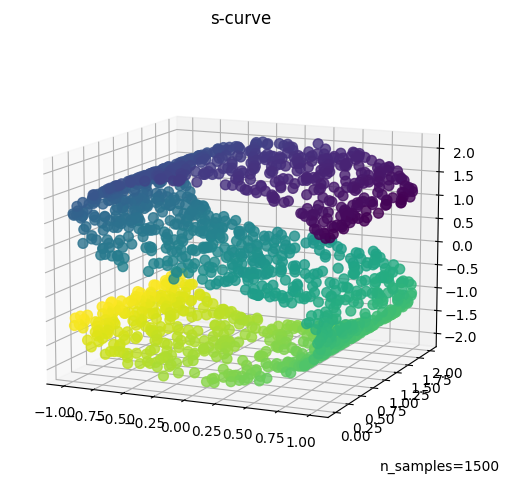

In [3]:
sr_points, y = datasets.make_s_curve(n_samples=1500, random_state=0)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=y, s=50, alpha=0.8
)
ax.set_title("s-curve")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)


x_train_np_ = sr_points 
x_train = torch.from_numpy(x_train_np_).float()

In [4]:

def train_model(alpha,epsilon, X, input_dim=3, output_dim=2, epochs=400, learning_rate=0.005, hidden_layers=[10,20]):
    model = LMPL_org(input_dim, output_dim, alpha, epsilon=epsilon,hidden_layers=hidden_layers)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    y_train = train_org(model, optimizer, X, epochs, alpha)
    return y_train

def plot_results(y_train, title):
    y_train_np = y_train.detach().numpy()
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=50, alpha=0.8)
    plt.title(title)
    plt.show()
    
def scan_dis_all(dis_values,epsilon_over_dis, X, lr, epochs, hidden_layers):
    num_alphas = len(dis_values)
    cols = 3
    rows = (num_alphas + cols - 1) // cols  
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
    axs = axs.flatten()  
    
    for i, distance in enumerate(dis_values):
        print(f"Training with distance={distance}")
        epsilon=distance*epsilon_over_dis
        alpha=1/(distance+epsilon)
        y_train = train_model(alpha, epsilon,X, learning_rate=lr, epochs=epochs, hidden_layers=hidden_layers)  
        y_train_np = y_train.detach().numpy()  
        
        if y_train_np.shape[0] == y_part.shape[0]:
            scatter = axs[i].scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=15, alpha=0.8)
        else:
            print("Warning: y_train_np and y_part shapes do not match!")
        scatter = axs[i].scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=15, alpha=0.8)  
        axs[i].set_title(f'Alpha={alpha} Hidden_layers={hidden_layers}')  
    
    plt.tight_layout()  
    plt.show() 
    
    return 

def scan_dis_epsilon_all(dis_values,epsilon_over_dis, X, lr, epochs, hidden_layers):
    num_distances = len(dis_values)
    num_epsilons = len(epsilon_over_dis)
    total_plots = num_distances * num_epsilons
    cols = 3 
    rows = (total_plots + cols - 1) // cols  
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
    axs = axs.flatten()  
    
    plot_idx = 0
    for distance in dis_values:
        
        for ratio in epsilon_over_dis:
            epsilon = distance * ratio
            alpha = 1 / (distance + epsilon)
            print(f"Training with distance={distance}, epsilon={ratio},hiddenlayer={hidden_layers}")
            
            y_train = train_model(alpha, epsilon, X, learning_rate=lr, epochs=epochs, hidden_layers=hidden_layers)
            y_train_np = y_train.detach().numpy()
            
            if y_train_np.shape[0] == y.shape[0]: 
                scatter = axs[plot_idx].scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=15, alpha=0.8)
            else:
                print("Warning: y_train_np and y_part shapes do not match!")
            
            axs[plot_idx].set_title(f'gamma={distance} epsilon={ratio}\nHidden_layers={hidden_layers}')
            plot_idx += 1

    
    plt.tight_layout()  
    plt.show() 
    
    return



Training with distance=0.5, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.1956
Epoch [100/500], Loss: 0.1363
Epoch [150/500], Loss: 0.1689
Epoch [200/500], Loss: 0.1545
Epoch [250/500], Loss: 0.1729
Epoch [300/500], Loss: 0.0719
Epoch [350/500], Loss: 0.0512
Epoch [400/500], Loss: 0.0379
Epoch [450/500], Loss: 0.0364
Epoch [500/500], Loss: 0.0358
Training with distance=1, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.1507
Epoch [100/500], Loss: 0.0450
Epoch [150/500], Loss: 0.0822
Epoch [200/500], Loss: 0.0394
Epoch [250/500], Loss: 0.0186
Epoch [300/500], Loss: 0.0171
Epoch [350/500], Loss: 0.0162
Epoch [400/500], Loss: 0.0153
Epoch [450/500], Loss: 0.0144
Epoch [500/500], Loss: 0.0151
Training with distance=2, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.0819
Epoch [100/500], Loss: 0.0148
Epoch [150/500], Loss: 0.0084
Epoch [200/500], Loss: 0.0076
Epoch [250/500], Loss: 0.0071
Epoch [300/500], Loss: 0.0105
Epoch [350/500], Loss: 0.0065
Epoch [400/500

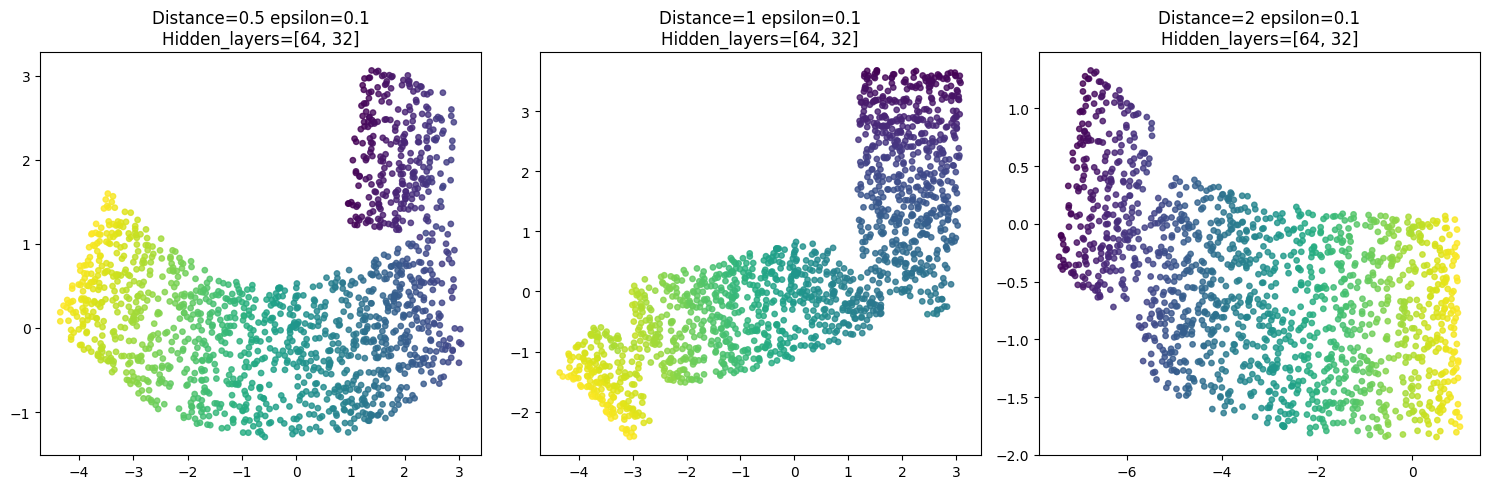

In [7]:
dis=[0.5,1,2]
hiddenlayers=[64,32]
epsilons=[0.1]
lr=0.05
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=500,hidden_layers=hiddenlayers)

Training with distance=0.5, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.1441
Epoch [100/500], Loss: 0.0678
Epoch [150/500], Loss: 0.0518
Epoch [200/500], Loss: 0.0422
Epoch [250/500], Loss: 0.0408
Epoch [300/500], Loss: 0.0403
Epoch [350/500], Loss: 0.0399
Epoch [400/500], Loss: 0.0396
Epoch [450/500], Loss: 0.0393
Epoch [500/500], Loss: 0.0391
Training with distance=1, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.0776
Epoch [100/500], Loss: 0.0413
Epoch [150/500], Loss: 0.0332
Epoch [200/500], Loss: 0.0285
Epoch [250/500], Loss: 0.0245
Epoch [300/500], Loss: 0.0227
Epoch [350/500], Loss: 0.0215
Epoch [400/500], Loss: 0.0209
Epoch [450/500], Loss: 0.0205
Epoch [500/500], Loss: 0.0201
Training with distance=2, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.0175
Epoch [100/500], Loss: 0.0127
Epoch [150/500], Loss: 0.0105
Epoch [200/500], Loss: 0.0095
Epoch [250/500], Loss: 0.0087
Epoch [300/500], Loss: 0.0084
Epoch [350/500], Loss: 0.0080
Epoch [400/500

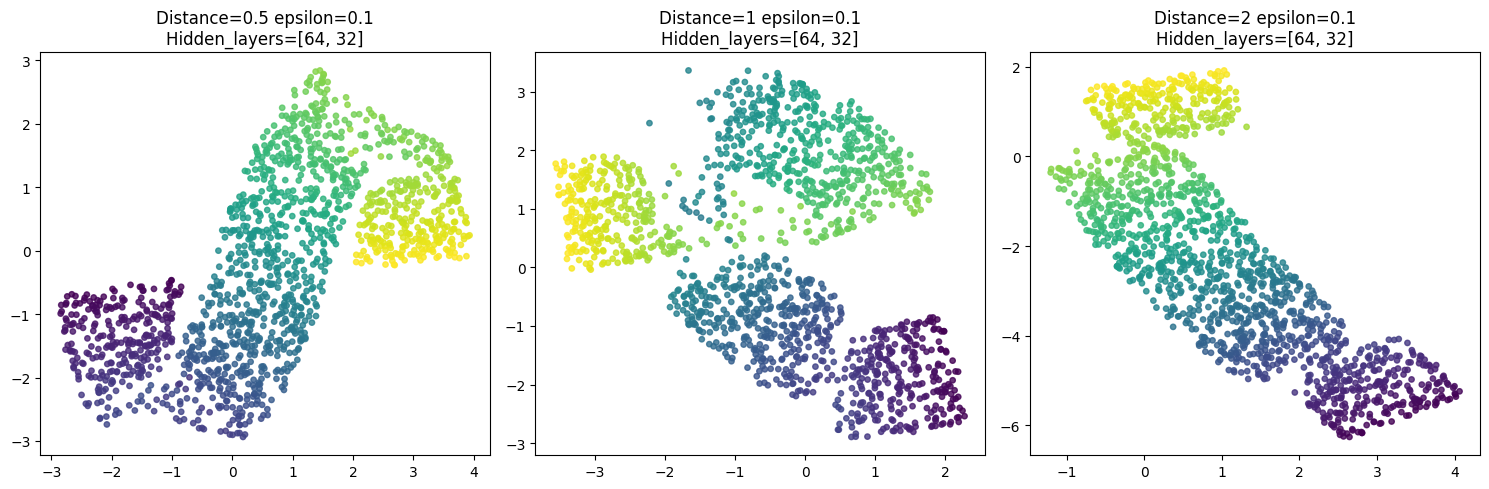

In [8]:
dis=[0.5,1,2]
hiddenlayers=[64,32]
epsilons=[0.1]
lr=0.02
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=500,hidden_layers=hiddenlayers)

Training with distance=0.5, epsilon=0.5,hiddenlayer=[20, 40]
Epoch [50/500], Loss: 0.0274
Epoch [100/500], Loss: 0.0212
Epoch [150/500], Loss: 0.0199
Epoch [200/500], Loss: 0.0199
Epoch [250/500], Loss: 0.0190
Epoch [300/500], Loss: 0.0186
Epoch [350/500], Loss: 0.0189
Epoch [400/500], Loss: 0.0182
Epoch [450/500], Loss: 0.0180
Epoch [500/500], Loss: 0.0179
Training with distance=1, epsilon=0.5,hiddenlayer=[20, 40]
Epoch [50/500], Loss: 0.0062
Epoch [100/500], Loss: 0.0046
Epoch [150/500], Loss: 0.0044
Epoch [200/500], Loss: 0.0043
Epoch [250/500], Loss: 0.0041
Epoch [300/500], Loss: 0.0040
Epoch [350/500], Loss: 0.0040
Epoch [400/500], Loss: 0.0040
Epoch [450/500], Loss: 0.0040
Epoch [500/500], Loss: 0.0040
Training with distance=2, epsilon=0.5,hiddenlayer=[20, 40]
Epoch [50/500], Loss: 0.0020
Epoch [100/500], Loss: 0.0018
Epoch [150/500], Loss: 0.0017
Epoch [200/500], Loss: 0.0016
Epoch [250/500], Loss: 0.0016
Epoch [300/500], Loss: 0.0016
Epoch [350/500], Loss: 0.0016
Epoch [400/500

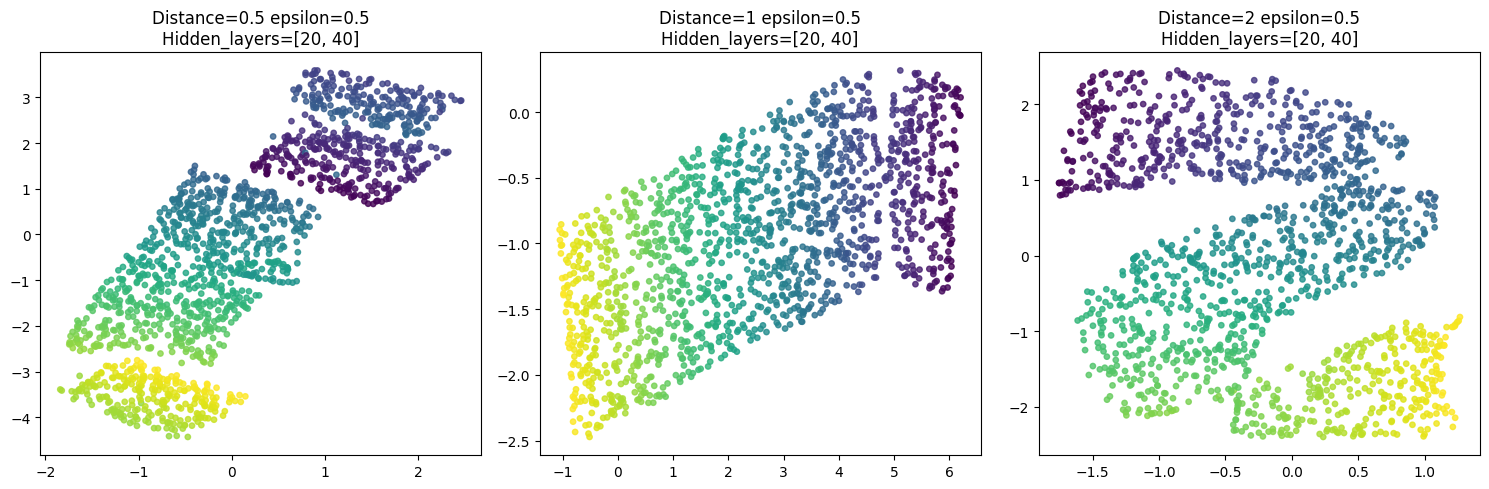

In [9]:
dis=[0.5,1,2]
hiddenlayers=[20,40]
epsilons=[0.5]
lr=0.02
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=500,hidden_layers=hiddenlayers)

Training with distance=0.8, epsilon=0.2,hiddenlayer=[80, 40]
Epoch [50/500], Loss: 0.0416
Epoch [100/500], Loss: 0.0746
Epoch [150/500], Loss: 0.0829
Epoch [200/500], Loss: 0.0785
Epoch [250/500], Loss: 0.0313
Epoch [300/500], Loss: 0.0175
Epoch [350/500], Loss: 0.0158
Epoch [400/500], Loss: 0.0150
Epoch [450/500], Loss: 0.0146
Epoch [500/500], Loss: 0.0153
Training with distance=1, epsilon=0.2,hiddenlayer=[80, 40]
Epoch [50/500], Loss: 0.0669
Epoch [100/500], Loss: 0.0636
Epoch [150/500], Loss: 0.0119
Epoch [200/500], Loss: 0.0095
Epoch [250/500], Loss: 0.0091
Epoch [300/500], Loss: 0.0086
Epoch [350/500], Loss: 0.0084
Epoch [400/500], Loss: 0.0092
Epoch [450/500], Loss: 0.0083
Epoch [500/500], Loss: 0.0081
Training with distance=1.5, epsilon=0.2,hiddenlayer=[80, 40]
Epoch [50/500], Loss: 0.0270
Epoch [100/500], Loss: 0.0064
Epoch [150/500], Loss: 0.0052
Epoch [200/500], Loss: 0.0046
Epoch [250/500], Loss: 0.0043
Epoch [300/500], Loss: 0.0042
Epoch [350/500], Loss: 0.0056
Epoch [400/5

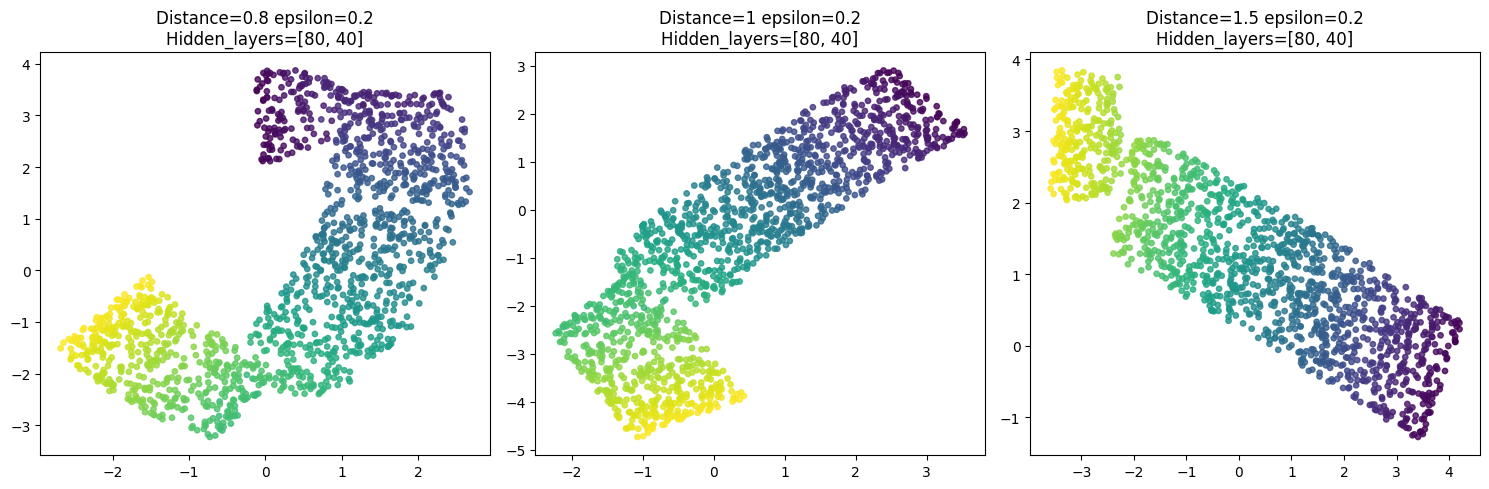

In [11]:
dis=[0.8,1,1.5]
hiddenlayers=[80,40]
epsilons=[0.2]
lr=0.05
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=500,hidden_layers=hiddenlayers)

Training with distance=1.5, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.0269
Epoch [100/500], Loss: 0.0151
Epoch [150/500], Loss: 0.0128
Epoch [200/500], Loss: 0.0130
Epoch [250/500], Loss: 0.0113
Epoch [300/500], Loss: 0.0106
Epoch [350/500], Loss: 0.0100
Epoch [400/500], Loss: 0.0110
Epoch [450/500], Loss: 0.0101
Epoch [500/500], Loss: 0.0093
Training with distance=1.6, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.0232
Epoch [100/500], Loss: 0.0132
Epoch [150/500], Loss: 0.0113
Epoch [200/500], Loss: 0.0101
Epoch [250/500], Loss: 0.0094
Epoch [300/500], Loss: 0.0088
Epoch [350/500], Loss: 0.0084
Epoch [400/500], Loss: 0.0085
Epoch [450/500], Loss: 0.0084
Epoch [500/500], Loss: 0.0078
Training with distance=1.7, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [50/500], Loss: 0.0395
Epoch [100/500], Loss: 0.0293
Epoch [150/500], Loss: 0.0266
Epoch [200/500], Loss: 0.0241
Epoch [250/500], Loss: 0.0217
Epoch [300/500], Loss: 0.0197
Epoch [350/500], Loss: 0.0185
Epoch [400

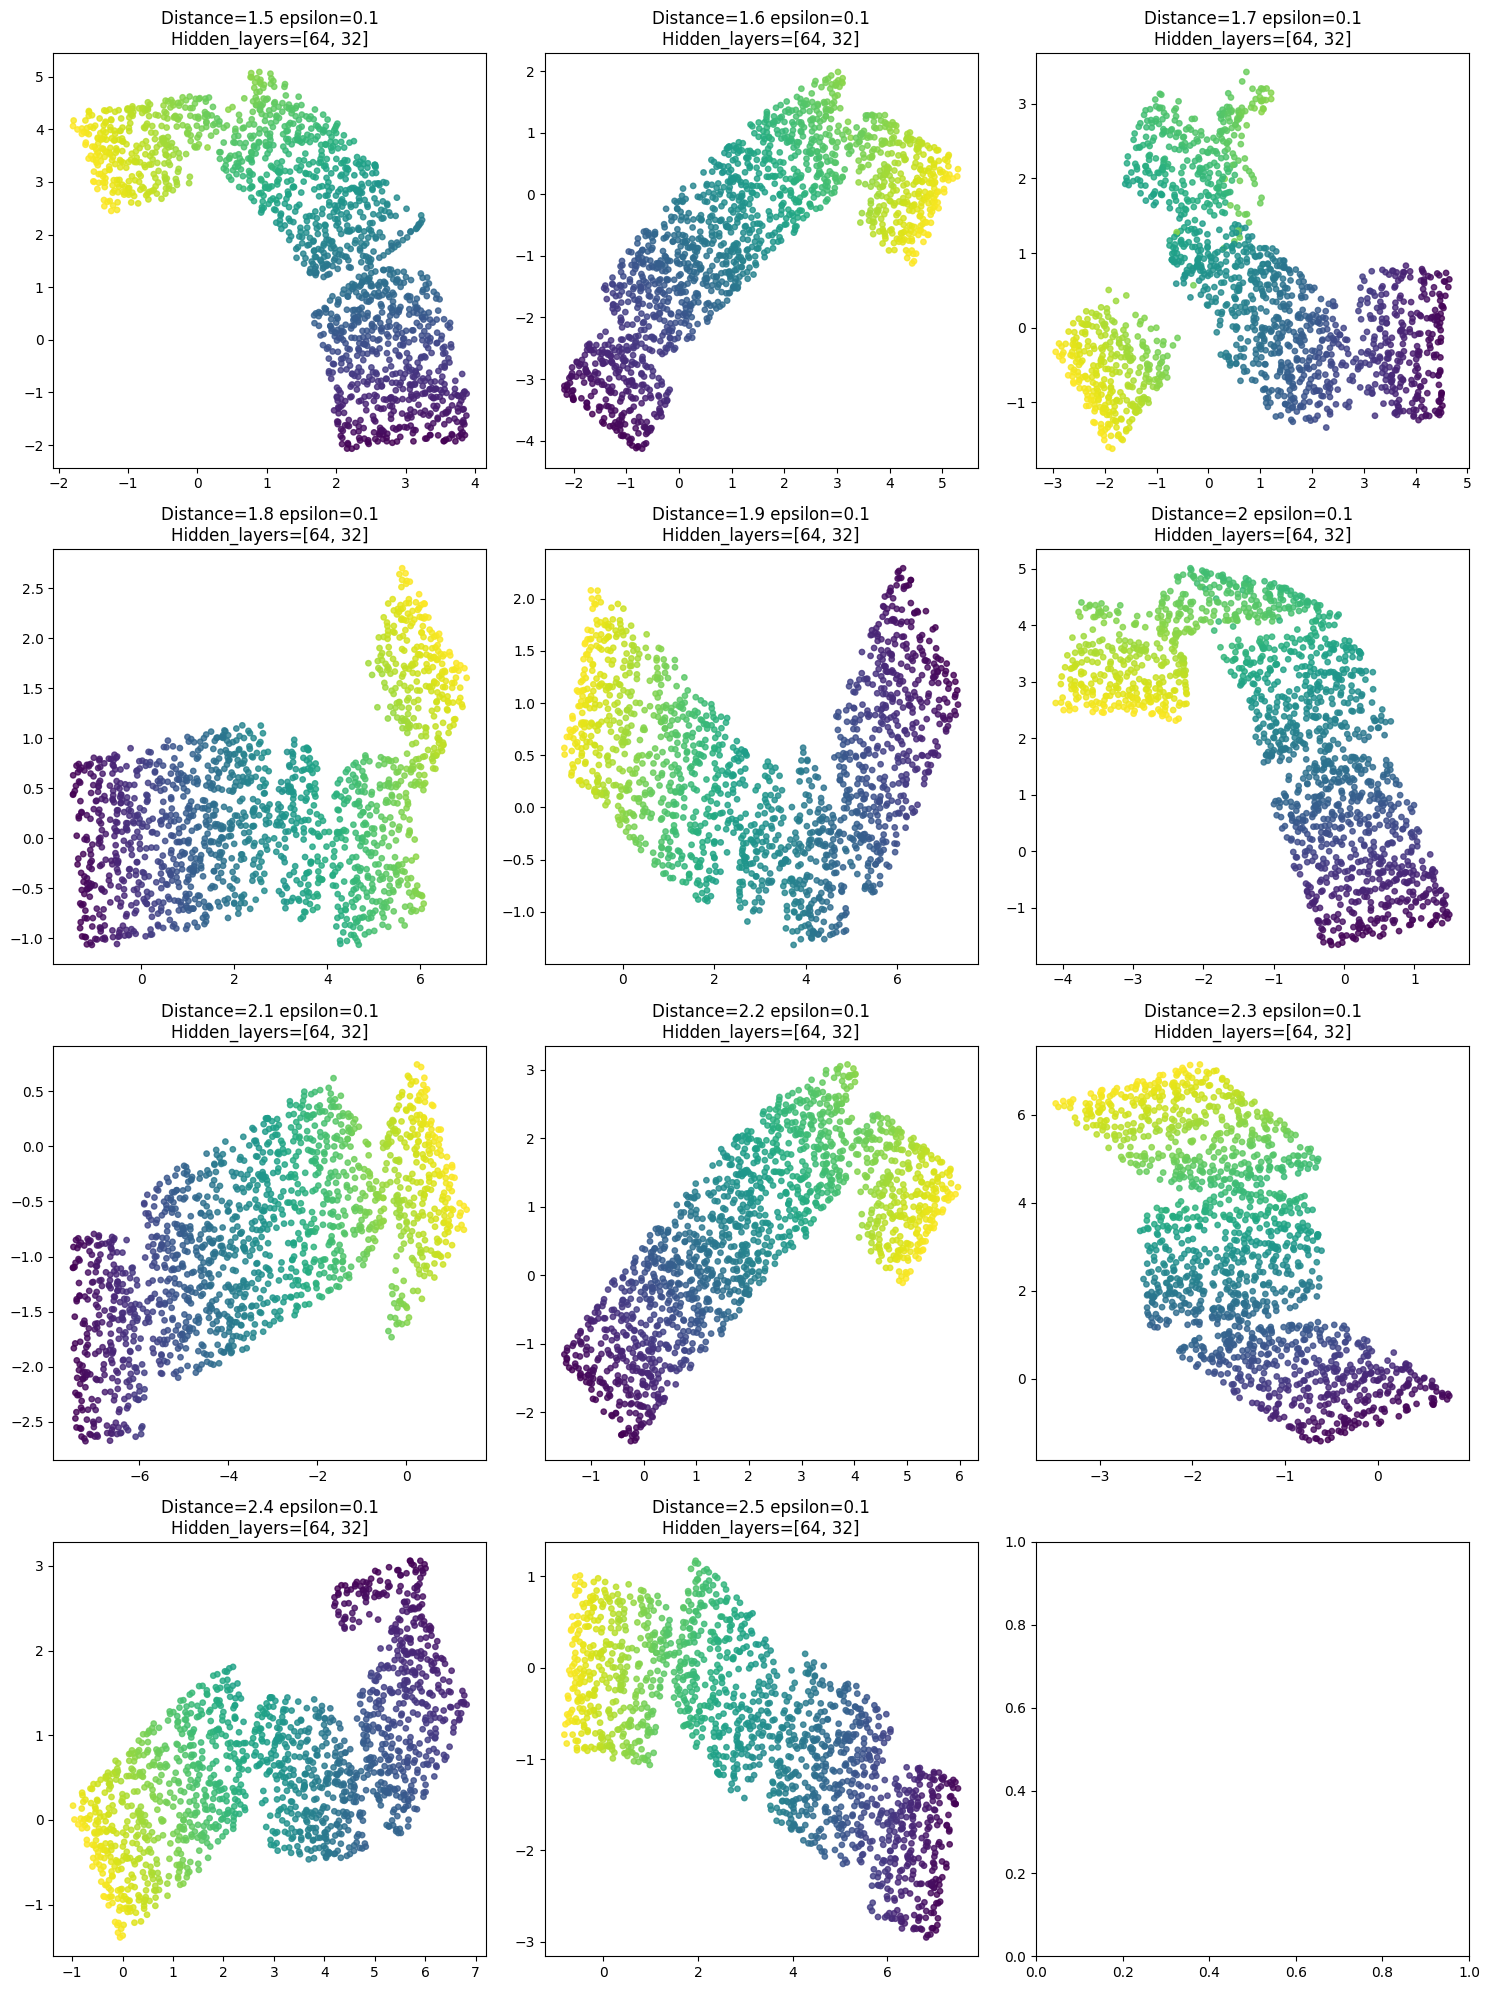

In [15]:
dis=[1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5]
hiddenlayers=[64,32]
epsilons=[0.1]
lr=0.02
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=500,hidden_layers=hiddenlayers)

Training with distance=2, epsilon=0.02,hiddenlayer=[64, 32]
Epoch [50/1000], Loss: 0.2474
Epoch [100/1000], Loss: 0.0946
Epoch [150/1000], Loss: 0.0595
Epoch [200/1000], Loss: 0.0481
Epoch [250/1000], Loss: 0.0359
Epoch [300/1000], Loss: 0.0326
Epoch [350/1000], Loss: 0.0309
Epoch [400/1000], Loss: 0.0296
Epoch [450/1000], Loss: 0.0284
Epoch [500/1000], Loss: 0.0274
Epoch [550/1000], Loss: 0.0267
Epoch [600/1000], Loss: 0.0261
Epoch [650/1000], Loss: 0.0243
Epoch [700/1000], Loss: 0.0235
Epoch [750/1000], Loss: 0.0230
Epoch [800/1000], Loss: 0.0299
Epoch [850/1000], Loss: 0.2349
Epoch [900/1000], Loss: 0.0634
Epoch [950/1000], Loss: 0.0381
Epoch [1000/1000], Loss: 0.0102


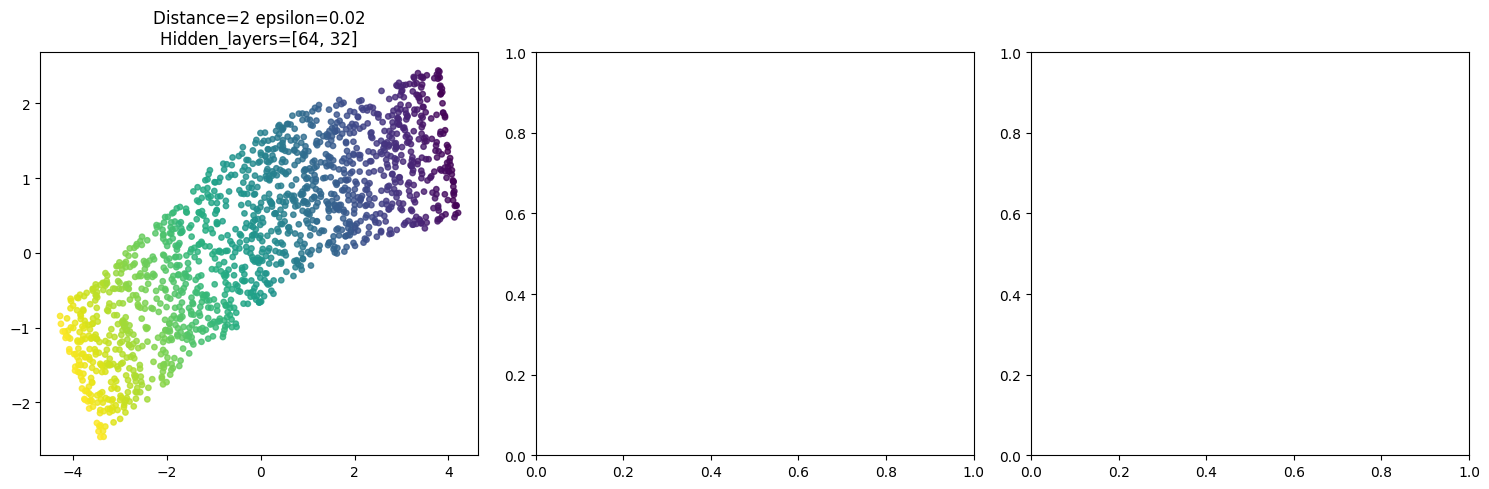

In [22]:
dis=[2]
hiddenlayers=[64,32]
epsilons=[0.02]
lr=0.03
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=1000,hidden_layers=hiddenlayers)

Training with distance=0.5, epsilon=0.02,hiddenlayer=[64, 32]
Epoch [1/1000], Loss: 2.1751
Epoch [50/1000], Loss: 0.5443
Epoch [100/1000], Loss: 0.5178
Epoch [150/1000], Loss: 0.4798
Epoch [200/1000], Loss: 0.5454
Epoch [250/1000], Loss: 0.5398
Epoch [300/1000], Loss: 0.5276
Epoch [350/1000], Loss: 0.5035
Epoch [400/1000], Loss: 0.4301
Epoch [450/1000], Loss: 0.5694
Epoch [500/1000], Loss: 0.5631
Epoch [550/1000], Loss: 0.5676
Epoch [600/1000], Loss: 0.5570
Epoch [650/1000], Loss: 0.5500
Epoch [700/1000], Loss: 0.5463
Epoch [750/1000], Loss: 0.5152
Epoch [800/1000], Loss: 0.5075
Epoch [850/1000], Loss: 0.5297
Epoch [900/1000], Loss: 0.5238
Epoch [950/1000], Loss: 0.5302
Epoch [1000/1000], Loss: 0.5354
Training with distance=1, epsilon=0.02,hiddenlayer=[64, 32]
Epoch [1/1000], Loss: 0.5410
Epoch [50/1000], Loss: 0.4003
Epoch [100/1000], Loss: 0.2677
Epoch [150/1000], Loss: 0.2152
Epoch [200/1000], Loss: 0.3294
Epoch [250/1000], Loss: 0.3662
Epoch [300/1000], Loss: 0.2529
Epoch [350/1000

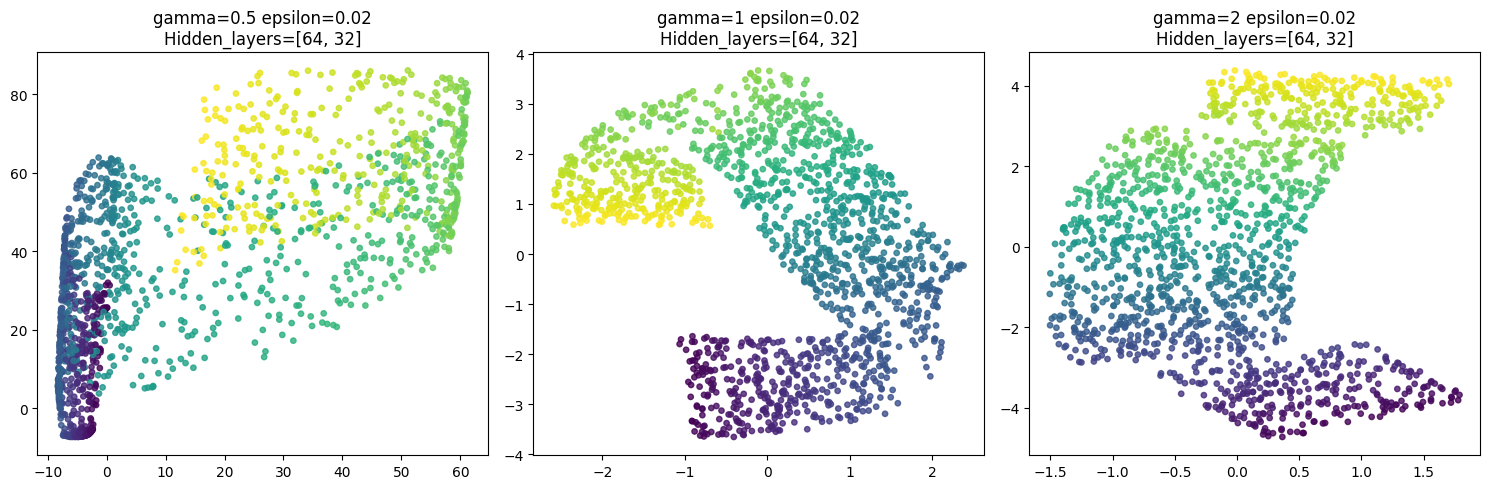

In [7]:
dis=[0.5,1,2]
hiddenlayers=[64,32]
epsilons=[0.02]
lr=0.03
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=1000,hidden_layers=hiddenlayers)